In [11]:
np.random.seed(71)

### Attempt at translating malab synthetic data code

- Would be good to translate dietrich94 data generation function as more realistic than gaussian/exponential/uniform samples

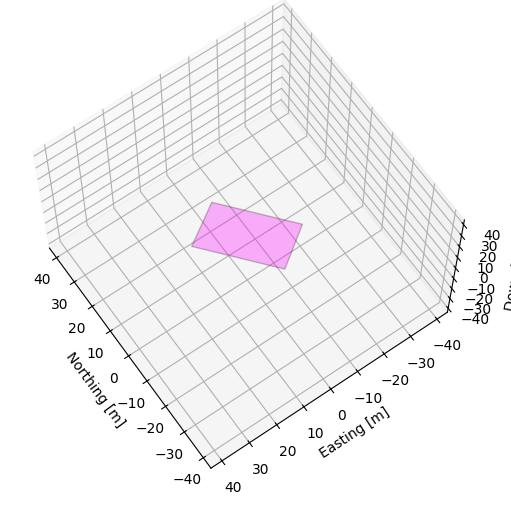

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Function to compute rectangular finite source patch
def get_rectangular_slippatch_from_FM(n0, e0, d0, strike, dip, mag, stressdrop):
    shearmod = 30e9  # [GPa]
    M0 = magnitude2moment(mag)
    L = (2 * M0 / (np.pi * stressdrop)) ** (1 / 3)  # [m]
    D = M0 / (shearmod * L ** 2)  # [m]

    # Change to radians
    dipdir = np.deg2rad(strike - 90)
    dip = np.deg2rad(dip)
    strike = np.deg2rad(strike)

    # Compute 4 corners of square with centre at [n0, e0, d0]
    rs = np.array([-L / 2, +L / 2, +L / 2, -L / 2])
    rd = np.array([-L / 2, -L / 2, +L / 2, +L / 2])

    dx = rs * np.cos(strike) + rd * np.cos(dip) * np.cos(dipdir)
    dy = rs * np.sin(strike) + rd * np.cos(dip) * np.sin(dipdir)
    dz = -rd * np.sin(dip)

    src_n4 = n0 + dx
    src_e4 = e0 + dy
    src_d4 = d0 + dz

    # Make closed surface
    src_n5 = np.append(src_n4, src_n4[0])
    src_e5 = np.append(src_e4, src_e4[0])
    src_d5 = np.append(src_d4, src_d4[0])

    return {
        'n0': n0,
        'e0': e0,
        'd0': d0,
        'mag': mag,
        'stk': np.rad2deg(strike),
        'dip': np.rad2deg(dip),
        'dipdir': np.rad2deg(strike - 90),
        'length': L,
        'slip': D,
        'stressdrop': stressdrop,
        'shearmod': shearmod,
        'n4': src_n4,
        'e4': src_e4,
        'd4': src_d4,
        'n5': src_n5,
        'e5': src_e5,
        'd5': src_d5
    }


# Function to plot rectangular finite source patch
"""
def plot_rectangular_slippatch(finsrc, colour='b'):
    plt.plot(finsrc['n0'], finsrc['e0'], finsrc['d0'], 'ok', markerfacecolor='r')
    plt.fill(finsrc['n5'], finsrc['e5'], finsrc['d5'], color=colour, edgecolor=[.2, .2, .2], alpha=0.3)
"""

def plot_rectangular_slippatch(finsrc, ax, colour='b'):
    # Define vertices for the 3D polygon
    verts = [list(zip(finsrc['n5'], finsrc['e5'], finsrc['d5']))]
    
    # Create a Poly3DCollection object
    poly = Poly3DCollection(verts, alpha=0.3, color=colour, edgecolor=[.2, .2, .2])
    
    # Add the polygon to the plot
    ax.add_collection3d(poly)

# Function to convert magnitude to moment
def magnitude2moment(mag):
    return 10**(1.5 * (mag + 6.03))

# Main script
# Specify plane orientation
stk0 = 40
dip0 = 40

# Specify hypocentral coordinates, magnitude & stressdrop
n0 = 0
e0 = 0
d0 = 0
mag = 1  # Source size
stressdrop = 1e6  # [Pa]

plane_colour = [1, 0, 1]
view_angle = [-115, 35]

# Compute rectangular finite source patch
finsrc = get_rectangular_slippatch_from_FM(n0, e0, d0, stk0, dip0, mag, stressdrop)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_rectangular_slippatch(finsrc, ax, plane_colour)

ax.set_xlabel('Northing [m]')
ax.set_ylabel('Easting [m]')
ax.set_zlabel('Down [m]')

lim = {'x': [n0 - 1.5*finsrc['length'], n0 + 1.5*finsrc['length']],
       'y': [e0 - 1.5*finsrc['length'], e0 + 1.5*finsrc['length']],
       'z': [d0 - 1.5*finsrc['length'], d0 + 1.5*finsrc['length']]}
ax.set_xlim(lim['x'])
ax.set_ylim(lim['y'])
ax.set_zlim(lim['z'])

plt.gca().invert_yaxis()
plt.gca().invert_zaxis()
plt.gca().view_init(view_angle[0], view_angle[1])

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import interact, FloatSlider

# Function to compute rectangular finite source patch
def get_rectangular_slippatch_from_FM(n0, e0, d0, strike, dip, mag, stressdrop):
    shearmod = 30e9  # [GPa]
    M0 = magnitude2moment(mag)
    L = (2 * M0 / (np.pi * stressdrop)) ** (1 / 3)  # [m]
    D = M0 / (shearmod * L ** 2)  # [m]

    # Change to radians
    dipdir = np.deg2rad(strike - 90)
    dip = np.deg2rad(dip)
    strike = np.deg2rad(strike)

    # Compute 4 corners of square with centre at [n0, e0, d0]
    rs = np.array([-L / 2, +L / 2, +L / 2, -L / 2])
    rd = np.array([-L / 2, -L / 2, +L / 2, +L / 2])

    dx = rs * np.cos(strike) + rd * np.cos(dip) * np.cos(dipdir)
    dy = rs * np.sin(strike) + rd * np.cos(dip) * np.sin(dipdir)
    dz = -rd * np.sin(dip)

    src_n4 = n0 + dx
    src_e4 = e0 + dy
    src_d4 = d0 + dz

    # Make closed surface
    src_n5 = np.append(src_n4, src_n4[0])
    src_e5 = np.append(src_e4, src_e4[0])
    src_d5 = np.append(src_d4, src_d4[0])

    return {
        'n0': n0,
        'e0': e0,
        'd0': d0,
        'mag': mag,
        'stk': np.rad2deg(strike),
        'dip': np.rad2deg(dip),
        'dipdir': np.rad2deg(strike - 90),
        'length': L,
        'slip': D,
        'stressdrop': stressdrop,
        'shearmod': shearmod,
        'n4': src_n4,
        'e4': src_e4,
        'd4': src_d4,
        'n5': src_n5,
        'e5': src_e5,
        'd5': src_d5
    }

# Function to plot rectangular finite source patch
def plot_rectangular_slippatch(n0, e0, d0, stk0, dip0, mag, stressdrop):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Compute rectangular finite source patch
    finsrc = get_rectangular_slippatch_from_FM(n0, e0, d0, stk0, dip0, mag, stressdrop)
    
    # Define vertices for the 3D polygon
    verts = [list(zip(finsrc['n5'], finsrc['e5'], finsrc['d5']))]
    
    # Create a Poly3DCollection object
    poly = Poly3DCollection(verts, alpha=0.3, color='b', edgecolor=[.2, .2, .2])
    
    # Add the polygon to the plot
    ax.add_collection3d(poly)

    # Set labels
    ax.set_xlabel('Northing [m]')
    ax.set_ylabel('Easting [m]')
    ax.set_zlabel('Down [m]')

    # Set limits
    lim = {'x': [n0 - 1.5*finsrc['length'], n0 + 1.5*finsrc['length']],
           'y': [e0 - 1.5*finsrc['length'], e0 + 1.5*finsrc['length']],
           'z': [d0 - 1.5*finsrc['length'], d0 + 1.5*finsrc['length']]}
    ax.set_xlim(lim['x'])
    ax.set_ylim(lim['y'])
    ax.set_zlim(lim['z'])

    # Invert y and z axis
    ax.invert_yaxis()
    ax.invert_zaxis()

    plt.show()

# Main script
# Specify plane orientation
stk0 = 40
dip0 = 40

# Specify hypocentral coordinates, magnitude & stressdrop
n0 = 0
e0 = 0
d0 = 0
mag = 1  # Source size
stressdrop = 1e6  # [Pa]

# Create interactive sliders
interact(plot_rectangular_slippatch, 
         n0=FloatSlider(min=-100, max=100, step=1, value=n0),
         e0=FloatSlider(min=-100, max=100, step=1, value=e0),
         d0=FloatSlider(min=-100, max=100, step=1, value=d0),
         stk0=FloatSlider(min=0, max=90, step=1, value=stk0),
         dip0=FloatSlider(min=0, max=90, step=1, value=dip0),
         mag=FloatSlider(min=0.1, max=10, step=0.1, value=mag),
         stressdrop=FloatSlider(min=1e3, max=1e7, step=1e3, value=stressdrop))

interactive(children=(FloatSlider(value=0.0, description='n0', min=-100.0, step=1.0), FloatSlider(value=0.0, d…

<function __main__.plot_rectangular_slippatch(n0, e0, d0, stk0, dip0, mag, stressdrop)>

### Custom Synthetic Data from different distributions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import random
import math

def generate_crack_points(center, direction_vector, length, width, num_points=100, distance_distribution='normal', distribution_param = 0.1, **kwargs):

    u = np.cross(np.array([0, 0, 1]), np.array(direction_vector))
    v = np.cross(np.array(direction_vector), u)
    u = u / np.linalg.norm(u)
    v = v / np.linalg.norm(v)

    x = np.random.uniform(-length/2, length/2, num_points).astype(float)
    y = np.random.uniform(-width/2, width/2, num_points).astype(float)
    
    distribution_param = np.random.uniform(0.05, 0.4)

    if distance_distribution == 'normal':
        dist = np.random.normal(loc=0, scale=distribution_param, size=num_points)
    elif distance_distribution == 'uniform':
        max_distance = kwargs.get('max_distance', distribution_param)
        dist = np.random.uniform(-max_distance, max_distance, size=num_points)
    elif distance_distribution == 'exponential':
        scale = kwargs.get('scale', distribution_param)
        dist = np.random.exponential(scale=scale, size=num_points)
    else:
        raise ValueError("Invalid distance distribution specified.")

    crack_points = center + x[:, None] * u + y[:, None] * v + dist[:, None] * direction_vector

    return crack_points


def random_unit_vector():
    # Generate random spherical coordinates
    theta = random.uniform(0, 2*math.pi)  # Azimuthal angle
    phi = random.uniform(0, math.pi)      # Polar angle

    # Convert spherical coordinates to Cartesian coordinates
    x = math.sin(phi) * math.cos(theta)
    y = math.sin(phi) * math.sin(theta)
    z = math.cos(phi)
    
    return (x, y, z)


def simple_static_plot(crack_points, normal_vector=None):
    """
    Visualize crack points in 3D and optionally plot the normal vector.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot crack points
    ax.scatter(crack_points[:, 0], crack_points[:, 1], crack_points[:, 2], c='r', s=5)

    # Optional: Plot normal vector
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    if normal_vector is not None:
        ax.quiver(0, 0, 0, normal_vector[0], normal_vector[1], normal_vector[2], color='b', length=1, normalize=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Synthetic Seismic Data - Crack Points')

    plt.show()


def simple_interactive_plot(points, x_range=[-10, 10], y_range=[-10, 10], z_range=[-10, 10]):

    """
    Visualize 3D points in an interactive plot using Plotly.
    """
    fig = go.Figure(data=[go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color='red',                # Change color if needed
            opacity=0.8
        )
    )])

    fig.update_layout(scene=dict(
                        xaxis_title='X',
                        yaxis_title='Y',
                        zaxis_title='Z'),
                      title='3D Visualization of Crack Points')
    

    scene_layout = dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')

    if x_range is not None:
        scene_layout['xaxis'] = dict(range=x_range)
    if y_range is not None:
        scene_layout['yaxis'] = dict(range=y_range)
    if z_range is not None:
        scene_layout['zaxis'] = dict(range=z_range)

    fig.update_layout(scene=scene_layout, title='3D Visualization of Crack Points')
    
    fig.show()




def multi_static_plot(crack_points_list):
    """
    Visualize crack points in 3D and optionally plot the normal vectors.

    Args:
    - crack_points_list: List of crack points arrays (each array represents points for one crack)
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot crack points for each crack
    for i, crack_points in enumerate(crack_points_list):
        ax.scatter(crack_points[:, 0], crack_points[:, 1], crack_points[:, 2], label=f'Crack {i+1}', s=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Synthetic Seismic Data - Fault Points')

    ax.legend()

    plt.show()



def multi_interactive_plot(crack_points_list, x_range=[-10, 10], y_range=[-10, 10], z_range=[-10, 10]):
    """
    Visualize multiple sets of 3D points in an interactive plot using Plotly.

    Args:
    - crack_points_list: List of point clouds (crack points), each represented as a numpy array of shape (N, 3).
    - x_range: Range of x-axis values (default is [-10, 10]).
    - y_range: Range of y-axis values (default is [-10, 10]).
    - z_range: Range of z-axis values (default is [-10, 10]).
    """
    fig = go.Figure()

    for i, points in enumerate(crack_points_list):
        fig.add_trace(go.Scatter3d(
            x=points[:, 0],
            y=points[:, 1],
            z=points[:, 2],
            mode='markers',
            name=f'Crack {i+1}',
            marker=dict(
                size=3,
                opacity=0.8
            )
        ))

    fig.update_layout(scene=dict(
                        xaxis_title='X',
                        yaxis_title='Y',
                        zaxis_title='Z'),
                      title='Interactive 3D Visualization of Crack Points')

    scene_layout = dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')

    if x_range is not None:
        scene_layout['xaxis'] = dict(range=x_range)
    if y_range is not None:
        scene_layout['yaxis'] = dict(range=y_range)
    if z_range is not None:
        scene_layout['zaxis'] = dict(range=z_range)

    fig.update_layout(scene=scene_layout)

    fig.show()



def plot_crack_normals(cracks_characteristics):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the normal vector of each crack
    for center, length, width, normal_vector in cracks_characteristics:
        # Calculate the endpoint of the normal vector
        endpoint = np.array(center) + np.array(normal_vector)

        # Plot the line representing the normal vector
        ax.plot([center[0], endpoint[0]], [center[1], endpoint[1]], [center[2], endpoint[2]], color='r')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Normal Vectors of Cracks')

    # Show plot
    plt.show()


### Generating Multiple cracks

In [4]:
def generate_cracks(max_cracks=5, L_max=5, W_max=1, center_dist = 0.4, domain=(-1,1)):
    """
    Generate cracks with random centers, lengths, widths, and normal angles to the plane.
    
    Args:
    - max_cracks: Max number of cracks to generate (default is 5)
    - L_max: Maximum length of crack (default is 20)
    - W_max: Maximum width of crack (default is 5)
    
    Returns:
    - cracks_info: List of tuples containing crack information (center, length, width, normals)
    """
    num_cracks = np.random.randint(2, max_cracks + 1)
    cracks_info = []
    
    # Generate crack centers
    for _ in range(num_cracks):
        while True:
            center = np.random.uniform(domain[0], domain[1], size=3)  # Random center in [-5, 5]^3
            if all(np.linalg.norm(center - c) > 2 * center_dist for c, _, _, _ in cracks_info):  # Ensure centers aren't too close
                break
        # Generate crack lengths, widths, and normal vector
        length = np.random.uniform(1, L_max)
        width = np.random.uniform(0.4, W_max)
        normal = random_unit_vector()
        
        cracks_info.append((center, length, width, normal))

    return cracks_info


def generate_dataset(n_clusters_max, VERBOSE=False):
    cracks_points_list = []
    cracks_characteristics = generate_cracks(n_clusters_max)
    for center, length, width, direction_vector in cracks_characteristics:
        cracks_points_list.append(generate_crack_points(center, direction_vector, length, width))

    if VERBOSE:
        print(f" Number of cracks: {len(cracks_characteristics)}, \n \
            \n These are the characteristics of the first crack: \
            \n    Center {cracks_characteristics[0][0]}, \
            \n    Length {cracks_characteristics[0][1]}, \
            \n    Width {cracks_characteristics[0][2]}, \
            \n    Normals {cracks_characteristics[0][3]}")

    return cracks_points_list

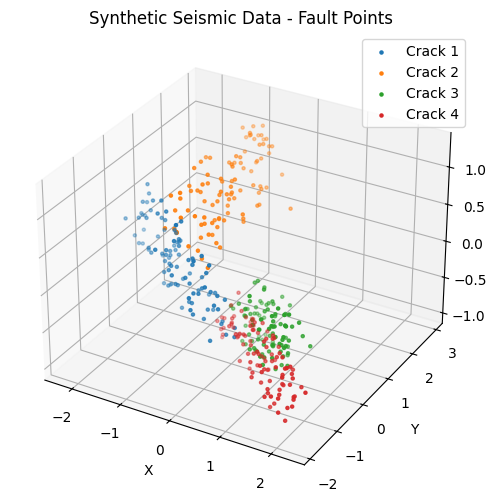

In [16]:
np.random.seed(31)

cracks_points_list = generate_dataset(5)
np.save('synthetics.npy', np.array(cracks_points_list))

multi_static_plot(cracks_points_list)
#multi_interactive_plot(cracks_points_list, [-2,2], [-2,2], [-2,2])

## Evaluation of off-the-shelf clustering methods on a synthetic dataset

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import RANSACRegressor
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
# Set the OMP_NUM_THREADS environment variable
import os
os.environ["OMP_NUM_THREADS"] = "2"



def assign_clusters_ransac(X, cluster_centers):
    # Compute the nearest cluster center for each data point
    nbrs = NearestNeighbors(n_neighbors=1).fit(cluster_centers)
    distances, indices = nbrs.kneighbors(X)
    return indices.flatten()


def evaluate_clustering(cracks_points_list, max_clusters, VERBOSE=False):
    # Concatenate all points into a single array
    all_points = np.concatenate(cracks_points_list)
    all_points = shuffle(all_points)

    # Initialize dictionaries to store silhouette scores and ideal settings
    silhouette_scores = {'KMeans': -1, 'Agglomerative': -1, 'DBSCAN': -1, 'RANSAC': -1}
    ideal_settings = {'KMeans': None, 'Agglomerative': None, 'DBSCAN': None, 'RANSAC': None}

    # Evaluate clustering using KMeans
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans_labels = kmeans.fit_predict(all_points)
        kmeans_score = silhouette_score(all_points, kmeans_labels)
        if kmeans_score > silhouette_scores['KMeans']:
            silhouette_scores['KMeans'] = kmeans_score
            ideal_settings['KMeans'] = {'n_clusters': n_clusters}
    if VERBOSE:
        print(f"Kmeans evaluation done, ideal settings: {ideal_settings['KMeans']}")

    # Evaluate clustering using Agglomerative Clustering
    for n_clusters in range(2, max_clusters + 1):
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        agglomerative_labels = agglomerative.fit_predict(all_points)
        agglomerative_score = silhouette_score(all_points, agglomerative_labels)
        if agglomerative_score > silhouette_scores['Agglomerative']:
            silhouette_scores['Agglomerative'] = agglomerative_score
            ideal_settings['Agglomerative'] = {'n_clusters': n_clusters}
    if VERBOSE:
        print(f"Agglomerative evaluation done, ideal settings: {ideal_settings['Agglomerative']}")

    # Evaluate clustering using DBSCAN
    for min_samples in range(2, 5):  # Try different values of min_samples for DBSCAN
        for eps in [0.04, 0.08, 0.12, 0.5, 1.0]:  # Try different values of eps for DBSCAN
            dbscan = DBSCAN(min_samples=min_samples, eps=eps)
            dbscan_labels = dbscan.fit_predict(all_points)
            unique_labels = np.unique(dbscan_labels)
            if len(unique_labels) > 1:
                dbscan_score = silhouette_score(all_points, dbscan_labels)
            else:
                dbscan_score = -1  # Avoid considering single cluster solution
                ideal_settings['DBSCAN'] = {'min_samples': 2, 'eps': 0.1}

            if dbscan_score > silhouette_scores['KMeans']:
                silhouette_scores['KMeans'] = dbscan_score
                ideal_settings['DBSCAN'] = {'min_samples': min_samples, 'eps': eps}

    if VERBOSE:
        print(f"DBSCAN evaluation done, ideal settings: {ideal_settings['DBSCAN']}")


    # Evaluate clustering using RANSAC
    kmeans = KMeans(n_clusters=10)  # Choose the number of clusters
    kmeans.fit(all_points[:100])  # Fit KMeans on a subset of points

    ransac = RANSACRegressor()
    ransac_labels = assign_clusters_ransac(all_points, kmeans.cluster_centers_)
    ransac_score = silhouette_score(all_points, ransac_labels)
    silhouette_scores['RANSAC'] = ransac_score
    ideal_settings['RANSAC'] = None  # No hyperparameters to tune for RANSAC
    if VERBOSE:
        print(f"RANSAC evaluation done, ideal settings: {ideal_settings['RANSAC']}")

    return silhouette_scores, ideal_settings


def plot_clusters_3d(points, labels, algorithm):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot points color-coded by cluster
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))
    for i, label in enumerate(unique_labels):
        cluster_points = points[labels == label]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}', c=[colors(i)], s=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Clusters for {algorithm}')
    ax.legend()

    plt.show()

#### Generate Dataset

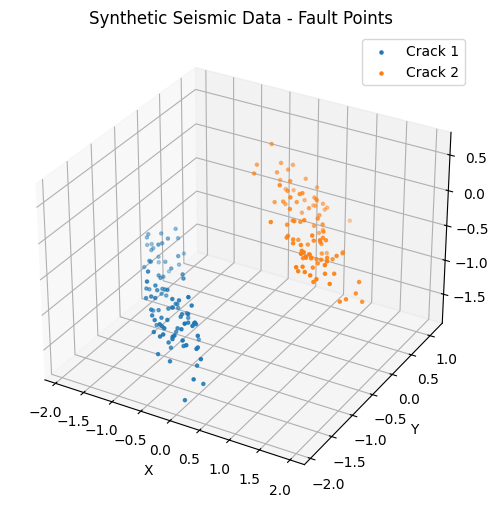

In [7]:
max_clusters = 6
cracks_points_list = generate_dataset(max_clusters)  
multi_static_plot(cracks_points_list)

#### Evaluate on this dataset

c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users

Kmeans evaluation done, ideal settings: {'n_clusters': 4}
Agglomerative evaluation done, ideal settings: {'n_clusters': 4}
DBSCAN evaluation done, ideal settings: {'min_samples': 2, 'eps': 0.1}


c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


RANSAC evaluation done, ideal settings: None
The silhouette scores are {'KMeans': 0.5207082624070233, 'Agglomerative': 0.5066985138240123, 'DBSCAN': -1, 'RANSAC': 0.43212443781297893} 
 
 and the ideal settings are: {'KMeans': {'n_clusters': 4}, 'Agglomerative': {'n_clusters': 4}, 'DBSCAN': {'min_samples': 2, 'eps': 0.1}, 'RANSAC': None}


c:\Users\houli\anaconda3\envs\raienv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\houli\AppData\Local\Temp\ipykernel_16280\3649609458.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


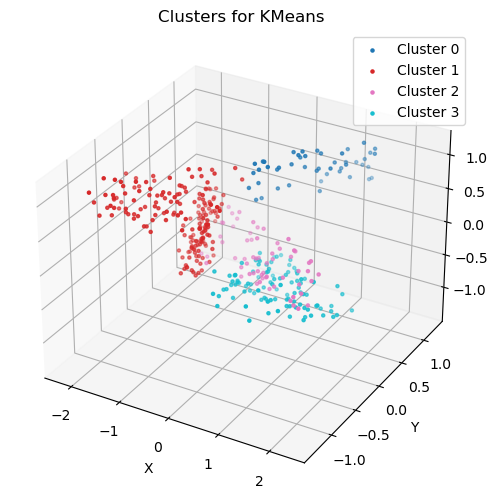

C:\Users\houli\AppData\Local\Temp\ipykernel_16280\3649609458.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


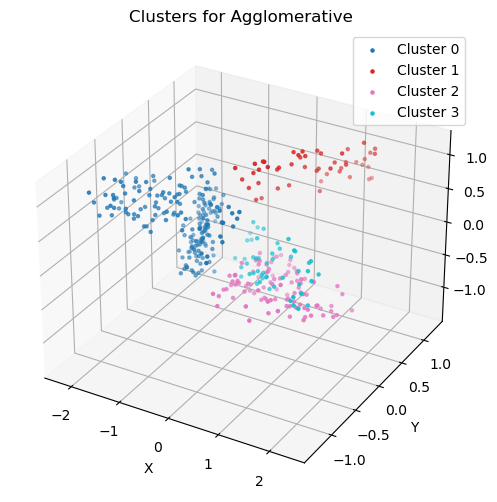

C:\Users\houli\AppData\Local\Temp\ipykernel_16280\3649609458.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


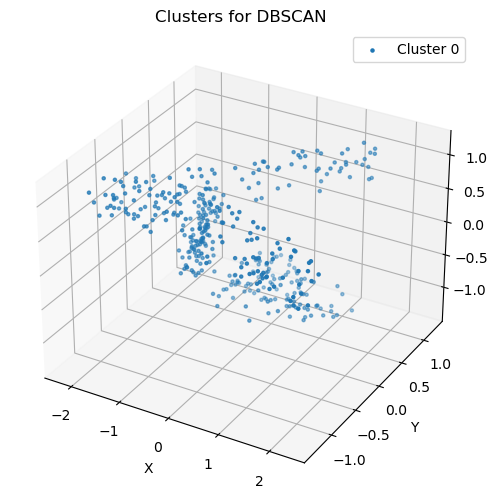

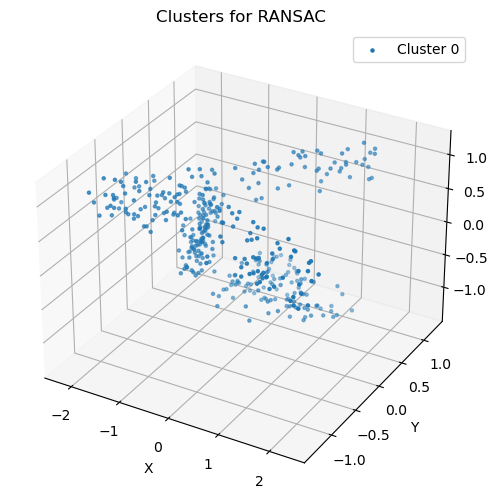

In [51]:
# Evaluate clustering algorithms
silhouette_scores, ideal_settings = evaluate_clustering(cracks_points_list, max_clusters+3, True)

print(f"The silhouette scores are {silhouette_scores} \n \n and the ideal settings are: {ideal_settings}")

# Plot clusters for each algorithm
for algorithm in silhouette_scores.keys():
    if algorithm == 'KMeans':
        n_clusters = ideal_settings['KMeans']['n_clusters']
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(np.concatenate(cracks_points_list))
    elif algorithm == 'Agglomerative':
        n_clusters = ideal_settings['Agglomerative']['n_clusters']
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agglomerative.fit_predict(np.concatenate(cracks_points_list))
    elif algorithm == 'DBSCAN':
        min_samples = ideal_settings['DBSCAN']['min_samples']
        dbscan = DBSCAN(min_samples=min_samples)
        labels = dbscan.fit_predict(np.concatenate(cracks_points_list))
    plot_clusters_3d(np.concatenate(cracks_points_list), labels, algorithm)

### Ladder Formation samples: 

In [ ]:
def generate_ladder_cracks(max_cracks=5, L_max=5, W_max=1, center_dist=0.5, domain=(-5, 5), angle_range=(10, 30)):
    """
    Generate cracks following a ladder-like pattern with two parallel cracks and smaller cracks perpendicular to them.
    
    Args:
    - max_cracks: Maximum number of cracks to generate (default is 5).
    - L_max: Maximum length of crack (default is 5).
    - W_max: Maximum width of crack (default is 1).
    - center_dist: Minimum distance between crack centers (default is 0.5).
    - domain: Domain to sample crack centers from (default is (-5, 5) for each dimension).
    - angle_range: Range of angles (in degrees) for smaller cracks to deviate from perpendicular (default is (10, 30)).
    
    Returns:
    - cracks_info: List of tuples containing crack information (center, length, width, normals).
    """
    num_cracks = np.random.randint(2, max_cracks + 1)
    cracks_info = []
    
    # Generate two parallel cracks
    normal_parallel = random_unit_vector()
    for _ in range(2):
        while True:
            center = np.random.uniform(domain[0], domain[1], size=3)  # Random center in specified domain
            if all(np.linalg.norm(center - c[0]) > 2 * center_dist for c in cracks_info):  # Ensure centers aren't too close
                break
        length = np.random.uniform(3, L_max)
        width = np.random.uniform(0.2, W_max)
        
        cracks_info.append((center, length, width, normal_parallel))
    
    # Generate smaller cracks perpendicular to the parallel cracks
    for _ in range(num_cracks - 2):
        while True:
            center = np.random.uniform(domain[0], domain[1], size=3)  # Random center in specified domain
            if all(np.linalg.norm(center - c[0]) > 2 * center_dist for c in cracks_info):  # Ensure centers aren't too close
                break
        length = np.random.uniform(0.5, 2)  # Length smaller than parallel cracks
        width = np.random.uniform(0.1, 0.5)  # Width smaller than parallel cracks
        angle = np.random.uniform(*angle_range)  # Angle deviation from perpendicular
        normals = np.array([np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0])
        cracks_info.append((center, length, width, normals))
    
    return cracks_info

In [ ]:
chacks_points_list = []
chacks_characteristics = generate_ladder_cracks(max_cracks=3, L_max=5, W_max=1, center_dist=0.5, domain=(-5, 5), angle_range=(10, 30))
for center, length, width, normal_vector in chacks_characteristics:
    chacks_points_list.append(generate_crack_points(center, normal_vector, length, width))

multi_static_plot(chacks_points_list)
multi_interactive_plot(chacks_points_list, [-5,5], [-5,5], [-5,5])